<a href="https://colab.research.google.com/github/zhihao-huang-07/Code4Paper_Unsupervised_Learning_of_Non_Hermitian_Topological_Phases/blob/main/Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

初态：N*N的1和-1的矩阵config
蒙特卡罗采样，采样次数N*N次，得到一个有效构型
计算构型能量和平均磁化强度

In [ ]:
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1   #随机自旋构型  2*(01)的矩阵然后所有元素减1
    return state


def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):      #从0到N
        for j in range(N):
                a = np.random.randint(0, N)    #0到N中的某个数
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb   #中间自旋与他临近自旋的相互作用
                if cost < 0:
                    s *= -1    #自旋翻转
                elif rand() < np.exp(-cost*beta):  #概率大于0-1随机数，则翻转
                    s *= -1
                config[a, b] = s
    return config


def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.


def calcMag(config):
    '''Magnetization of a given configuration'''   #算磁化强度
    mag = np.sum(config)
    return mag

定义参数数值
nt温度格点数
N=10,100个格点数，10*10矩阵
1024个该温度下的样本构型
n1n2求平均值用

In [ ]:
## change these parameters for a smaller (faster) simulation 
nt      = 64         #  number of temperature points
N       = 10         #  size of the lattice, N x N
eqSteps = 10      #  number of MC sweeps for equilibration
mcSteps = 10       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)  #[0,0,0......]
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

代入数值计算

In [ ]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for tt in range(nt):   #0-64
    E1 = M1 = E2 = M2 = 0
   
    iT=1.0/T[tt]; iT2=iT*iT;
    data = []

    for i in range(eqSteps):    
        config = initialstate(N)     # equilibrate
        config_ = mcmove(config, iT)           # Monte Carlo moves
        data.append(config_.reshape((-1)))
    data = np.asarray(data)
    print(data.shape)

    # for i in range(mcSteps):
    #     mcmove(config, iT)           
    #     Ene = calcEnergy(config)     # calculate the energy
    #     Mag = calcMag(config)        # calculate the magnetisation

    #     E1 = E1 + Ene
    #     M1 = M1 + Mag
    #     M2 = M2 + Mag*Mag 
    #     E2 = E2 + Ene*Ene

    # E[tt] = n1*E1   #算平均值
    # M[tt] = n1*M1
    # C[tt] = (n1*E2 - n2*E1*E1)*iT2
    # X[tt] = (n1*M2 - n2*M1*M1)*iT

(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)
(10, 100)


In [ ]:
a = [1]
print(a)
a.append(1)
print(a)

[1]
[1, 1]


图形参数设置

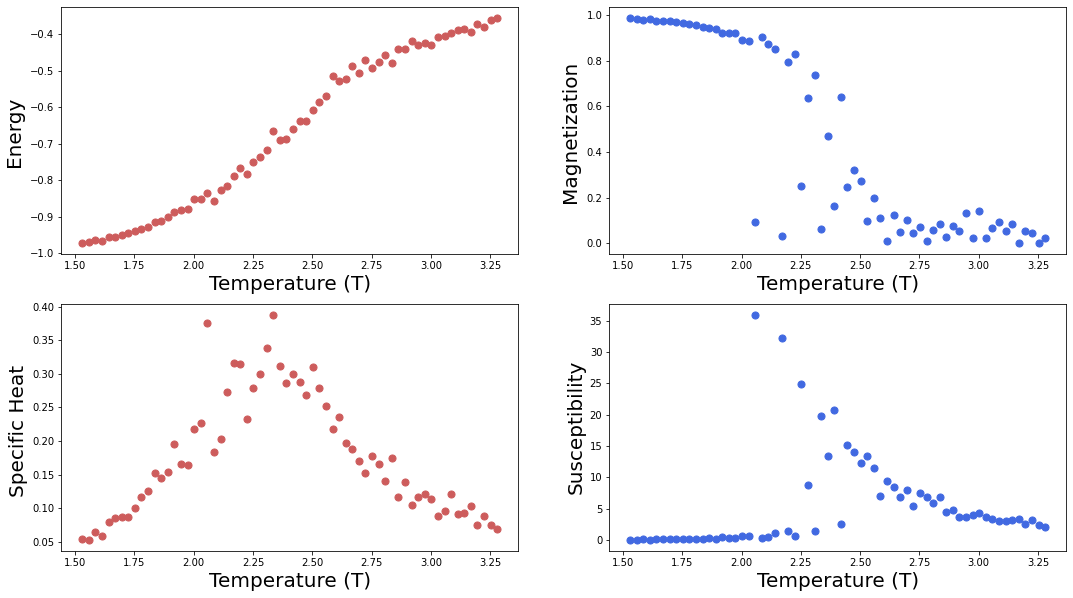

In [ ]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    图形的宽18高10

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import k_means

对每个构型进行扁平化，然后构成矩阵

In [ ]:
for tt in range(nt):   #0-32
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[tt]; iT2=iT*iT;
    
    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation
        data = config.reshape(-1,N*N) #扁平化

In [ ]:
pca = PCA()
XPCA = pca.fit_transform(data)

卡主了

In [ ]:
print(XPCA)

[[0.]]


In [ ]:
plt.figure(figsize=[12,6])

plt.scatter(XPCA[:,0], XPCA[:,1])

plt.colorbar()
plt.ylabel('P2')
plt.xlabel('P1')

plt.show()

计算ch

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(X)  #分割训练集和测试集，random保证每次分割都一样
labels = kmeans_model.labels_
metrics.calinski_harabaz_score(X, labels)   #X为1024个同温度下的样本，labels为Kmeans后的两个特征的样本

计算sc

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')